In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("..")  # Sube un nivel para acceder a los módulos
import image_loader as loader

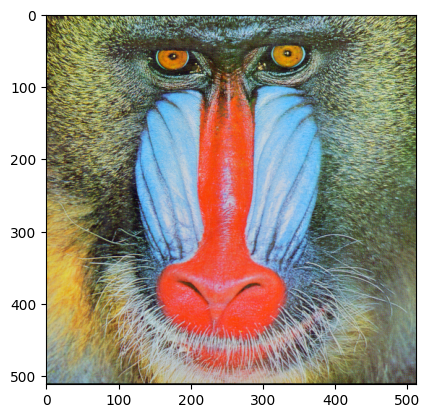

In [3]:
image_path = "../images/monkey.tiff"
image = loader.load_image(image_path)
imrgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(imrgb)

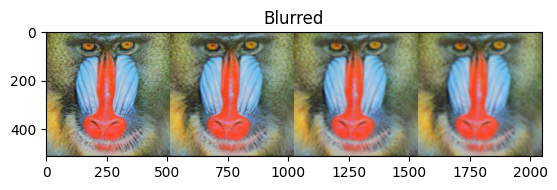

In [ ]:
# Average blurring

blurred = np.hstack([  # stack the blurred images
    cv2.blur(imrgb, (5, 5)), # image source, kernell size
    cv2.blur(imrgb, (7, 7)), 
    cv2.blur(imrgb, (9, 9)), 
    cv2.blur(imrgb, (11, 11))
])
plt.imshow(blurred)
plt.title("Blurred")
plt.show()

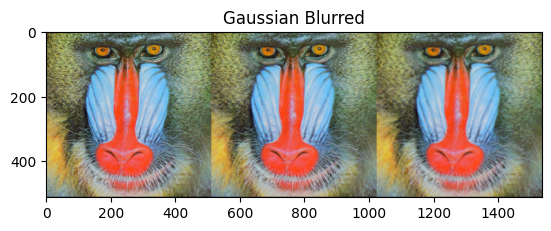

In [10]:
# Gaussian blurring

gauss_blurred = np.hstack([  
    cv2.GaussianBlur(imrgb, (3, 3), 0),  # image source, kernell size, sigma parameter - std dev on x direction 
    cv2.GaussianBlur(imrgb, (5, 5), 0),  # sigma = 0 <- cv2 uses kernell size to find it
    cv2.GaussianBlur(imrgb, (7, 7), 0), 
])
plt.imshow(gauss_blurred)
plt.title("Gaussian Blurred")
plt.show()

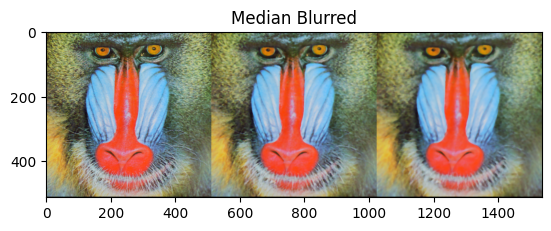

In [11]:
# Median bludd: the most efective for salt & pepper like noise

median_blurred = np.hstack([  
    cv2.medianBlur(imrgb, 3),  # image source, kernell size
    cv2.medianBlur(imrgb, 5),  
    cv2.medianBlur(imrgb, 7),  
])
plt.imshow(median_blurred)
plt.title("Median Blurred")
plt.show()

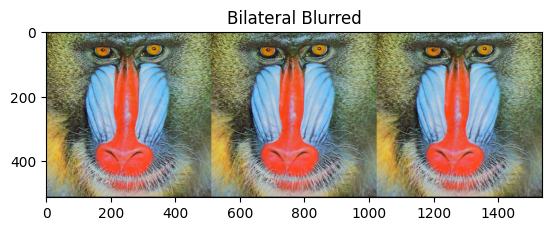

In [ ]:
# Bilateral blurring: used to mantain edges while reducing noise
# Uses two gaussians, one for the spatial neighbors and other
# for the intensity neighbors, ensuring pixeks with similar intensities. 
# It's a big time consuming method for blurring. 

bilateral_blurred = np.hstack([
    cv2.bilateralFilter(imrgb, 7, 21, 21),  # image source, diameter of pixel neighborhood,
    cv2.bilateralFilter(imrgb, 7, 31, 31),  # sigma-color: neighborhood intensities 
    cv2.bilateralFilter(imrgb, 7, 41, 41)   # sigma-space: spatial neighborhood 
])
plt.imshow(bilateral_blurred)
plt.title("Bilateral Blurred")
plt.show()